## 1.0 Data Importation

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import folium
# Load data from URL into a dataframe
df = pd.read_json("https://data.cityofchicago.org/resource/dfnk-7re6.json")
# Save dataframe as a CSV file
df.to_csv("chicago_data.csv", index=False)

In [2]:
df= pd.read_csv('chicago_data.csv')
df.head()

,case_,date_of_occurrence,block,_primary_decsription,fbi_cd,_secondary_description,ward,_location_description,domestic,beat,...,:@computed_region_43wa_7qmu,location,y_coordinate,latitude,:@computed_region_awaf_s7ux,x_coordinate,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k
0,JF238175,2022-05-11T11:25:00.000,002XX W MADISON ST,THEFT,06,RETAIL THEFT,42,DRUG STORE,N,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JF228949,2022-04-25T12:00:00.000,010XX W DIVERSEY PKWY,THEFT,06,FROM BUILDING,44,RESIDENCE - GARAGE,N,1933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JF293270,2022-06-24T01:00:00.000,054XX S Ingleside Ave,THEFT,06,OVER $500,5,STREET,N,233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JF361213,2022-08-16T09:00:00.000,013XX W FULTON ST,THEFT,06,OVER $500,27,PARKING LOT / GARAGE (NON RESIDENTIAL),N,1215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JF322873,2022-07-16T12:20:00.000,015XX N milwaukee ave,THEFT,06,RETAIL THEFT,1,SMALL RETAIL STORE,N,1424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.0 Data Cleaning

In [3]:
cols_to_drop = [':@computed_region_vrxf_vc4k',':@computed_region_6mkv_f3dw',':@computed_region_bdys_3d7i', 'x_coordinate', ':@computed_region_awaf_s7ux',':@computed_region_43wa_7qmu','y_coordinate']
df= df.drop(columns=cols_to_drop)

In [4]:
df.columns

Index(['case_', 'date_of_occurrence', 'block', '_primary_decsription',
       'fbi_cd', '_secondary_description', 'ward', '_location_description',
       'domestic', 'beat', '_iucr', 'arrest', 'location', 'latitude',
       'longitude'],
      dtype='object')

## 3.0 Missing Values

In [5]:
# lets look at missin values
df.isnull().sum()

case_                       0
date_of_occurrence          0
block                       0
_primary_decsription        0
fbi_cd                      0
_secondary_description      0
ward                        0
_location_description      11
domestic                    0
beat                        0
_iucr                       0
arrest                      0
location                  177
latitude                  177
longitude                 177
dtype: int64

In [6]:
df.dropna()

,case_,date_of_occurrence,block,_primary_decsription,fbi_cd,_secondary_description,ward,_location_description,domestic,beat,_iucr,arrest,location,latitude,longitude
8,JG139874,2023-02-02T21:00:00.000,007XX W FULTON MARKET,THEFT,06,$500 AND UNDER,42,PARKING LOT / GARAGE (NON RESIDENTIAL),N,1214,0820,N,"{'latitude': '41.886801163', 'human_address': ...",41.886801,-87.645920
11,JG178630,2023-03-08T14:43:00.000,039XX W MADISON ST,ASSAULT,08A,SIMPLE,28,STREET,Y,1122,0560,N,"{'latitude': '41.880751096', 'human_address': ...",41.880751,-87.723856
12,JG179348,2023-03-08T01:40:00.000,075XX N SHERIDAN RD,THEFT,06,OVER $500,49,APARTMENT,N,2422,0810,N,"{'latitude': '42.018616136', 'human_address': ...",42.018616,-87.665846
28,JG184210,2023-02-06T00:00:00.000,047XX S KOLIN AVE,DECEPTIVE PRACTICE,11,FINANCIAL IDENTITY THEFT $300 AND UNDER,14,STREET,N,815,1154,N,"{'latitude': '41.806858653', 'human_address': ...",41.806859,-87.732124
40,JG178911,2023-03-08T20:24:00.000,025XX W CULLERTON ST,CRIMINAL TRESPASS,26,TO LAND,24,OTHER RAILROAD PROPERTY / TRAIN DEPOT,N,1023,1330,Y,"{'latitude': '41.854762866', 'human_address': ...",41.854763,-87.689136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,JG138530,2023-02-02T14:00:00.000,027XX N CLYBOURN AVE,CRIMINAL DAMAGE,14,TO VEHICLE,32,GAS STATION,N,1931,1320,N,"{'latitude': '41.931120002', 'human_address': ...",41.931120,-87.676785
995,JG178196,2023-03-08T06:00:00.000,031XX N MELVINA AVE,OTHER OFFENSE,26,HARASSMENT BY TELEPHONE,36,APARTMENT,N,2511,2825,N,"{'latitude': '41.937848872', 'human_address': ...",41.937849,-87.781053
996,JG138104,2023-02-02T11:00:00.000,019XX N HAMLIN AVE,OTHER OFFENSE,26,OTHER CRIME INVOLVING PROPERTY,26,SCHOOL - PUBLIC BUILDING,N,2535,5001,N,"{'latitude': '41.916321128', 'human_address': ...",41.916321,-87.721640
998,JG138829,2023-02-02T20:45:00.000,004XX N MILWAUKEE AVE,THEFT,06,OVER $500,27,VEHICLE NON-COMMERCIAL,N,1214,0810,N,"{'latitude': '41.890465282', 'human_address': ...",41.890465,-87.646472


## 4.0 Data Visualizations

Which month had highest crime rates?

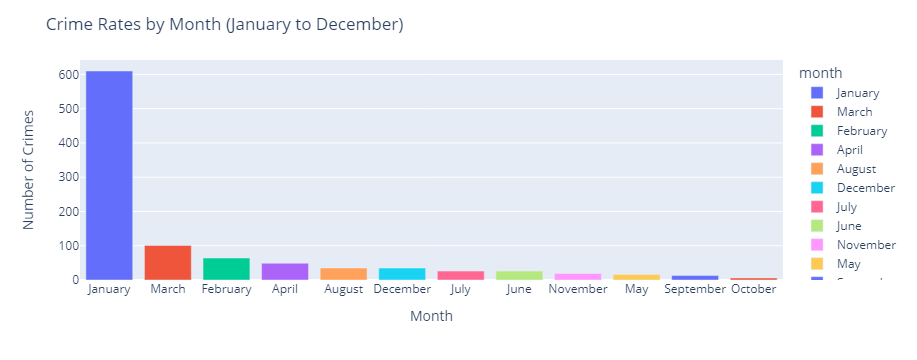

,month,count
4,January,610
7,March,101
3,February,64
0,April,49
1,August,35
2,December,35
5,July,26
6,June,26
9,November,19
8,May,16


In [31]:
# convert 'date_of_occurrence' from object to 'datetime'
df['date_of_occurrence']= pd.to_datetime(df['date_of_occurrence'])
df['month'] = df['date_of_occurrence'].dt.month_name()
df['hour'] = df['date_of_occurrence'].dt.hour
# Group the data by month and count the number of occurrences
grouped_df = df.groupby('month').size().reset_index(name='count').sort_values(by='count', ascending=False)

# Plot a bar chart using Plotly Express
fig = px.bar(grouped_df, x='month', y='count', color='month')

fig.update_layout(
    title='Crime Rates by Month (January to December)',
    xaxis_title='Month',
    yaxis_title='Number of Crimes'
)

fig.show()
grouped_df

From visualization above its clear majority of crime rates mostly occurs in January and March

## Which type of crimes have the highest rate? 

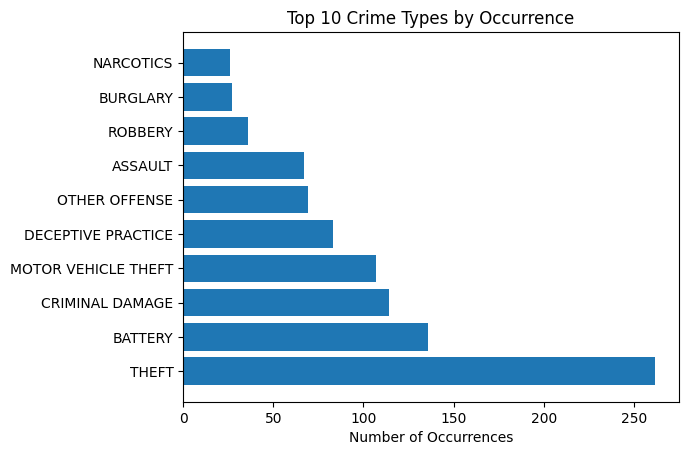

_primary_decsription
THEFT                                262
BATTERY                              136
CRIMINAL DAMAGE                      114
MOTOR VEHICLE THEFT                  107
DECEPTIVE PRACTICE                    83
OTHER OFFENSE                         69
ASSAULT                               67
ROBBERY                               36
BURGLARY                              27
NARCOTICS                             26
WEAPONS VIOLATION                     24
CRIMINAL TRESPASS                     17
OFFENSE INVOLVING CHILDREN            11
SEX OFFENSE                            5
ARSON                                  4
HOMICIDE                               4
CRIMINAL SEXUAL ASSAULT                3
INTIMIDATION                           2
PROSTITUTION                           1
PUBLIC PEACE VIOLATION                 1
CONCEALED CARRY LICENSE VIOLATION      1
dtype: int64

In [23]:
# Group by primary description and count the number of occurrences
crime_counts = df.groupby('_primary_decsription').size().sort_values(ascending=False)

# Plot a horizontal bar chart of the top 10 crime types
plt.barh(crime_counts.index[:10], crime_counts.values[:10])
plt.xlabel('Number of Occurrences')
plt.title('Top 10 Crime Types by Occurrence')
plt.show()
crime_counts

## Which time of the day does most of crimes occurs?

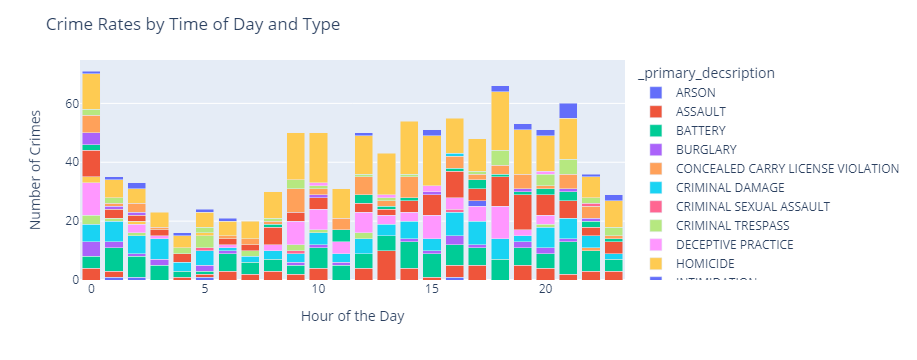

,_primary_decsription,hour,count
0,ARSON,1,1
1,ARSON,2,1
2,ARSON,5,1
3,ARSON,16,1
4,ASSAULT,0,4
...,...,...,...
242,WEAPONS VIOLATION,19,2
243,WEAPONS VIOLATION,20,2
244,WEAPONS VIOLATION,21,5
245,WEAPONS VIOLATION,22,1


In [16]:
# Group the data by primary type and hour, and count the number of crimes
df_grouped = df.groupby(['_primary_decsription', 'hour']).size().reset_index(name='count')

# Create the stacked bar chart
fig = px.bar(df_grouped, x='hour', y='count', color='_primary_decsription', barmode='stack')

# Add axis labels and title
fig.update_layout(xaxis_title='Hour of the Day', yaxis_title='Number of Crimes', title='Crime Rates by Time of Day and Type')

# Show the chart
fig.show()
df_grouped

## Which day of the Weeks has most crime rates?

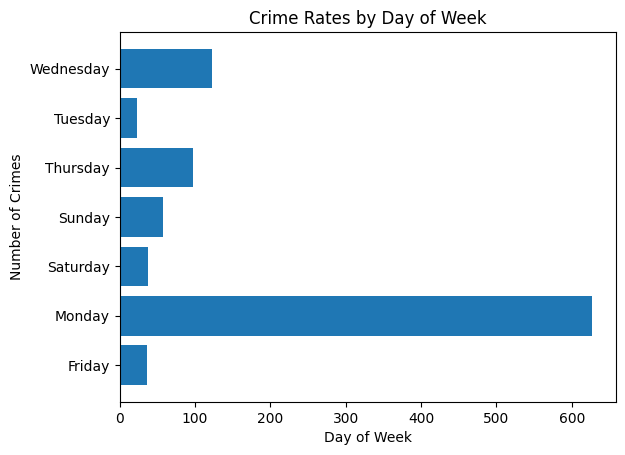

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='date_of_occurrence')

In [26]:

# Group the data by day of the week
by_day = df.groupby(df["date_of_occurrence"].dt.day_name())

# Count the number of crimes in each group
counts = by_day["_primary_decsription"].count()

# Create a bar chart
plt.barh(counts.index, counts.values)
plt.title("Crime Rates by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.show()
counts.index

## Which locations in Chicago where theft is dominant?

In [11]:
from folium import plugins
# Filter the data by location and type of crime
filtered_data = df.loc[(df['_location_description'] == 'STREET') & (df['_primary_decsription'] == 'THEFT')]

# Group the data by location
grouped_data = filtered_data.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Create a map centered on Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add a heatmap layer with markers
heat_map = folium.plugins.HeatMap(data=grouped_data[['latitude', 'longitude', 'count']], radius=15, blur=10)
chicago_map.add_child(heat_map)

# Display the map
chicago_map
